In [2]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

Using TensorFlow backend.


In [2]:
count = 0
videoFile = "Train.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="Mrframe%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


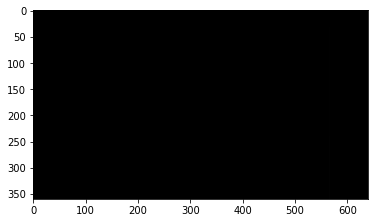

In [3]:
img = plt.imread('Mrframe0.jpg')   # reading image using its name
plt.imshow(img)

In [4]:
data = pd.read_csv('Mrmapping.csv')     # reading the csv file
data.head()      # printing first five rows of the file

,Image_ID,Class
0,Mrframe0.jpg,0
1,Mrframe1.jpg,0
2,Mrframe2.jpg,0
3,Mrframe3.jpg,0
4,Mrframe4.jpg,1


In [5]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [6]:
y = data.Class
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [7]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224,3)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

C:\Users\SAIRAM_LUKKA\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\SAIRAM_LUKKA\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [8]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf')      # preprocessing the input data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set

In [10]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [11]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer

In [12]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

((125, 7, 7, 512), (54, 7, 7, 512))

In [13]:
X_train = X_train.reshape(125, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(54, 7*7*512)

In [14]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [19]:
# i. Building the model
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(2, activation='softmax'))    # output layer

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2050      
Total params: 25,693,186
Trainable params: 25,693,186
Non-trainable params: 0
_________________________________________________________________


In [22]:
# ii. Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# iii. Training the model
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Train on 125 samples, validate on 54 samples
Epoch 1/100
125/125 [==============================] - 5s 42ms/step - loss: 0.5585 - accuracy: 0.7120 - val_loss: 0.5864 - val_accuracy: 0.6481
Epoch 2/100
125/125 [==============================] - 3s 23ms/step - loss: 0.1465 - accuracy: 0.9520 - val_loss: 0.3394 - val_accuracy: 0.8889
Epoch 3/100
125/125 [==============================] - 3s 21ms/step - loss: 0.0685 - accuracy: 0.9840 - val_loss: 0.2547 - val_accuracy: 0.9444
Epoch 4/100
125/125 [==============================] - 2s 20ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.2834 - val_accuracy: 0.8704
Epoch 5/100
125/125 [==============================] - 3s 20ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.2893 - val_accuracy: 0.8704
Epoch 6/100
125/125 [==============================] - 3s 21ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.2475 - val_accuracy: 0.8704
Epoch 7/100
125/125 [==============================] - 3s 21ms/step - loss: 0.0033 - accura

In [ ]:
# Screen time

In [24]:
count = 0
videoFile = "Test.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="Mrtest%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [45]:
test = pd.read_csv('Mrtest1.csv')

In [46]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [47]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [48]:
# preprocessing the images
test_image = preprocess_input(test_image, mode='tf')

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

# converting the images to 1-D form
test_image = test_image.reshape(647, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [49]:
predictions = model.predict_classes(test_image)

In [50]:
print("The screen time of Mr Bean is", predictions[predictions==1].shape[0], "seconds")
print("The screen time of others is", predictions[predictions==0].shape[0], "seconds")

The screen time of Mr Bean is 411 seconds
The screen time of others is 236 seconds
